In [7]:
library(tidyverse)
library(gridExtra)

options(repr.plot.width=8, repr.plot.height=4)

In [3]:
T <- 50

# Illustrating cointegrated systems (WS 6.1)

## CASE 1:

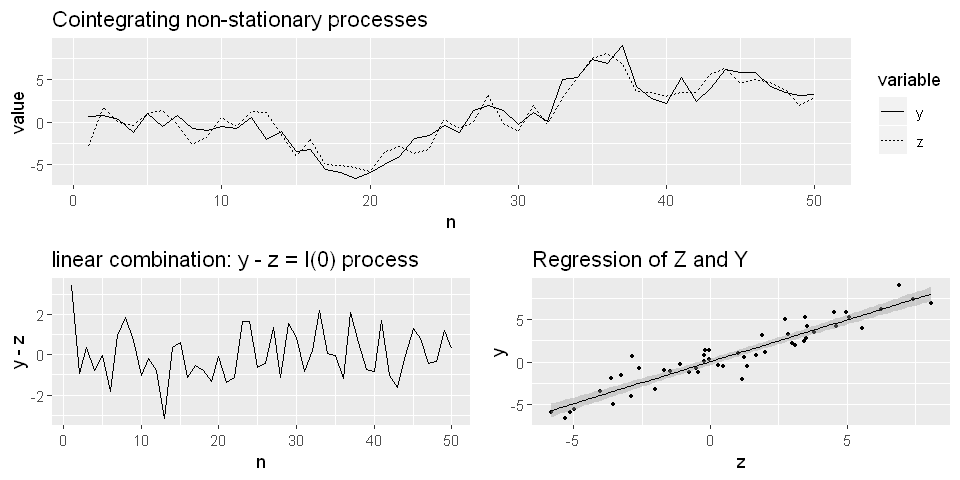

In [4]:
set.seed(5)

trend <- cumsum(rnorm(T))

y <- trend + rnorm(T)
z <- trend + rnorm(T)

df <- data.frame(y,z,n = c(1:T))

p1 <- ggplot(gather(df, variable, value, -n), aes(n, value, linetype=variable)) + 
  geom_line() + 
  labs(title="Cointegrating non-stationary processes")

p2 <- ggplot(df, aes(n, y-z)) + 
  geom_line() + 
  labs(title="linear combination: y - z = I(0) process")

p3 <- ggplot(df, aes(z,y)) + 
  geom_point(size=0.8) +
  geom_smooth(method=lm, color="black", size=0.5) +
  labs(title="Regression of Z and Y")

sys <- rbind(c(1,1),c(2,3))

grid.arrange(p1,p2, p3, layout_matrix = sys)

## CASE 2:

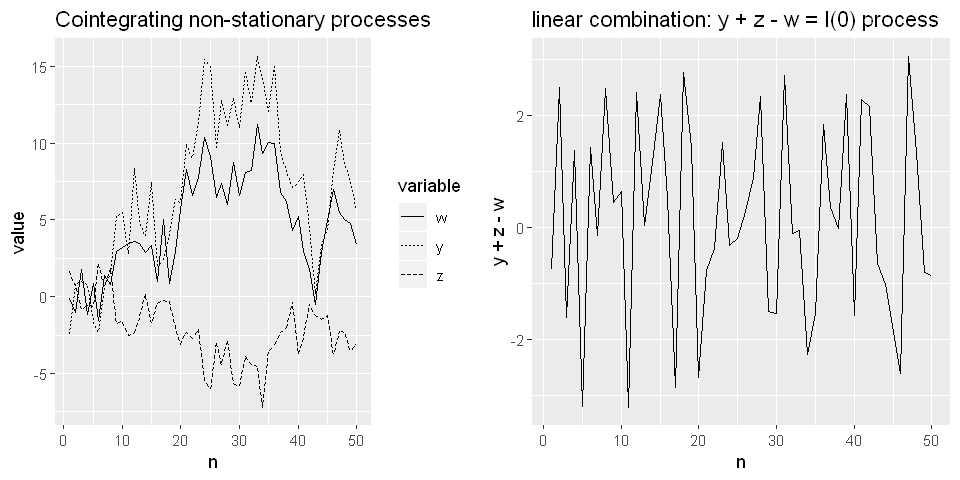

In [5]:
set.seed(2)
trend <- cumsum(rnorm(T))

y <- 1.8 * trend + rnorm(T)
z <- -0.6 * trend + rnorm(T)
w <- 1.2 * trend + rnorm(T)

df <- data.frame(y,z,w,n = c(1:T))

p1 <- ggplot(gather(df, variable, value, -n), aes(n, value, linetype=variable)) + 
  geom_line() + 
  labs(title="Cointegrating non-stationary processes")

p2 <- ggplot(df, aes(n, y+z-w)) + 
  geom_line() + 
  labs(title="linear combination: y + z - w = I(0) process")

grid.arrange(p1,p2, nrow=1)

# Non-integrated variables (WS 6.2)

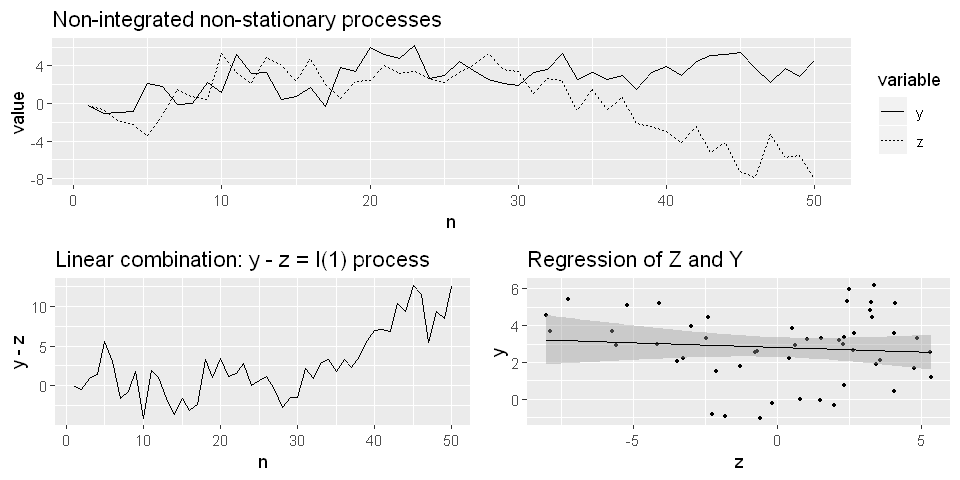

In [6]:
set.seed(1)

y <- cumsum(rnorm(T)) + rnorm(T)
z <- cumsum(rnorm(T)) + rnorm(T)

df <- data.frame(y,z,n = c(1:T))

p1 <- ggplot(gather(df, variable, value, -n), aes(n, value, linetype=variable)) + 
  geom_line() + 
  labs(title="Non-integrated non-stationary processes")

p2 <- ggplot(df, aes(n, y-z)) + 
  geom_line() + 
  labs(title="Linear combination: y - z = I(1) process")

p3 <- ggplot(df, aes(z,y)) + 
  geom_point(size=0.8) +
  geom_smooth(method=lm, color="black", size=0.5) +
  labs(title="Regression of Z and Y")

sys <- rbind(c(1,1),c(2,3))

grid.arrange(p1,p2, p3, layout_matrix = sys)